In [1]:
%%time
import malaya

CPU times: user 5.26 s, sys: 1.51 s, total: 6.77 s
Wall time: 9.58 s


In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [3]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
husein = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

## Calculate similarity using doc2vec

We can use any word vector interface provided by Malaya to use doc2vec similarity interface.

Important parameters,
1. `aggregation`, aggregation function to accumulate word vectors. Default is `mean`.

    * ``'mean'`` - mean.
    * ``'min'`` - min.
    * ``'max'`` - max.
    * ``'sum'`` - sum.
    * ``'sqrt'`` - square root.
   
2. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### Using word2vec

I will use `load_news`, word2vec from wikipedia took a very long time. wikipedia much more accurate.

In [5]:
vocab_news, embedded_news = malaya.wordvector.load_news()
w2v = malaya.wordvector.load(embedded_news, vocab_news)
doc2vec = malaya.similarity.doc2vec(w2v)

#### predict for 2 strings

In [6]:
doc2vec.predict_proba([string1], [string2], aggregation = 'mean', soft = False)

array([0.899711], dtype=float32)

#### predict batch of strings

In [7]:
doc2vec.predict_proba([string1, string2], [string3, string4])

array([0.9215344, 0.853461 ], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

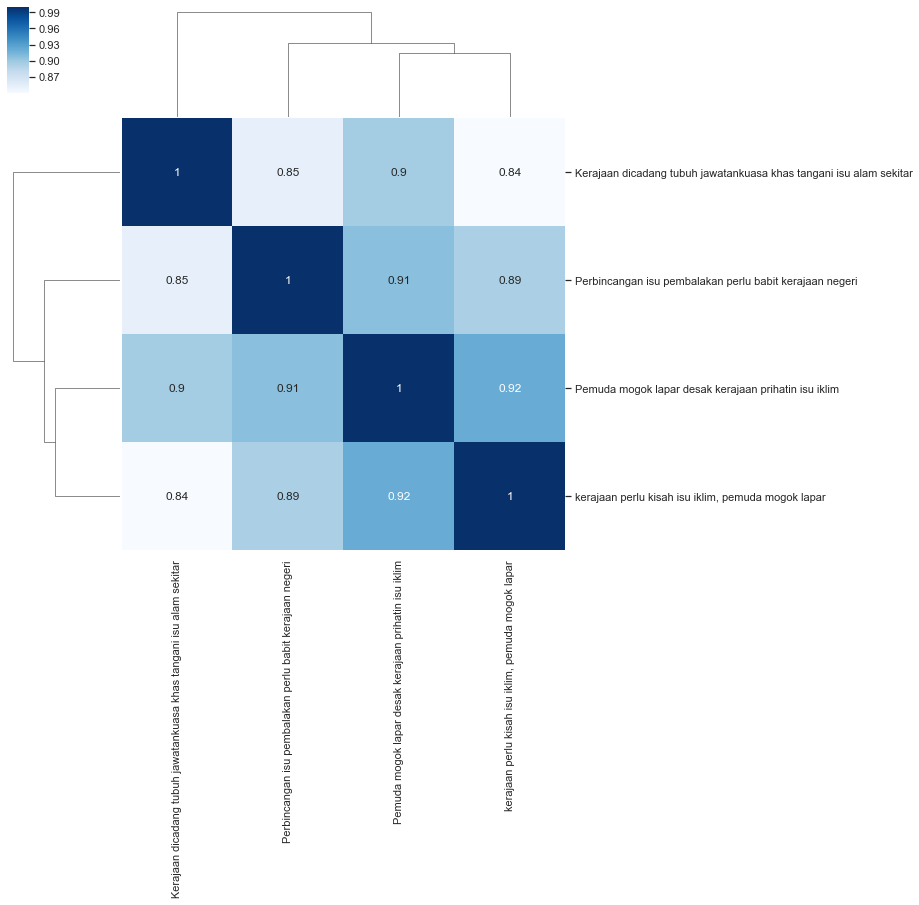

In [9]:
doc2vec.tree_plot([string1, string2, string3, string4])

Different similarity function different percentage.

## Calculate similarity using deep encoder

We can use any encoder models provided by Malaya to use encoder similarity interface, example, BERT, XLNET, and skip-thought. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

Important parameters,
   
1. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### using xlnet

In [11]:
xlnet = malaya.transformer.load(model = 'xlnet')
encoder = malaya.similarity.encoder(xlnet)

INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>
INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/xlnet-model/base/xlnet-base/model.ckpt


#### predict for 2 strings

In [12]:
encoder.predict_proba([string1], [string2])

array([0.80475146], dtype=float32)

#### predict batch of strings

In [17]:
encoder.predict_proba([string1, string2, news1, news1], [string3, string4, husein, string1])

array([0.82172215, 0.74461347, 0.7767106 , 0.5949546 ], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

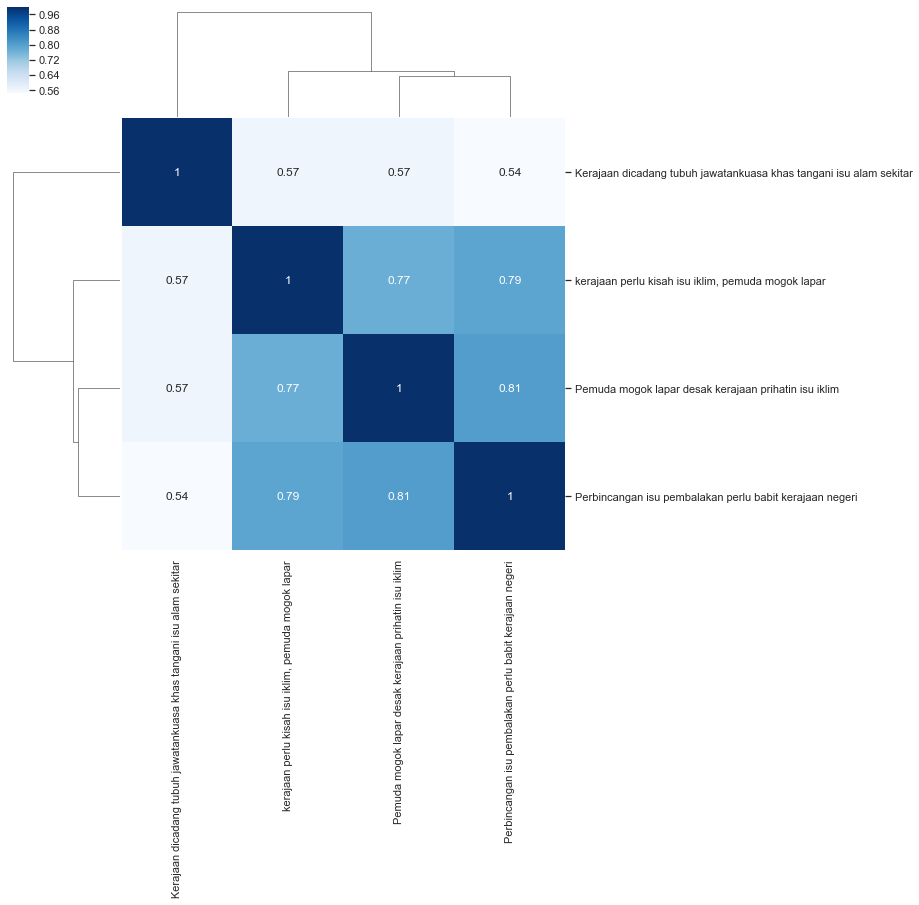

In [14]:
encoder.tree_plot([string1, string2, string3, string4])

## List available Transformer models

In [2]:
malaya.similarity.available_transformer()

{'bert': ['423.4 MB', 'accuracy: 0.885'],
 'tiny-bert': ['56.6 MB', 'accuracy: 0.873'],
 'albert': ['46.3 MB', 'accuracy: 0.873'],
 'tiny-albert': ['21.9 MB', 'accuracy: 0.824'],
 'xlnet': ['448.7 MB', 'accuracy: 0.784'],
 'alxlnet': ['49.0 MB', 'accuracy: 0.888']}

We trained on [Quora Question Pairs](https://github.com/huseinzol05/Malay-Dataset#quora), [translated SNLI](https://github.com/huseinzol05/Malay-Dataset#snli) and [translated MNLI](https://github.com/huseinzol05/Malay-Dataset#mnli)

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALXLNET, a very small size, 49MB, but the accuracy is still on the top notch.**

## Load transformer model

In this example, I am going to load `alxlnet`, feel free to use any available models above.

In [5]:
model = malaya.similarity.transformer(model = 'alxlnet')

#### predict batch

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.



In [6]:
model.predict_proba([string1, string2, news1, news1], [string3, string4, husein, string1])

array([0.9980831 , 0.08294717, 0.92421347, 0.5633721 ], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

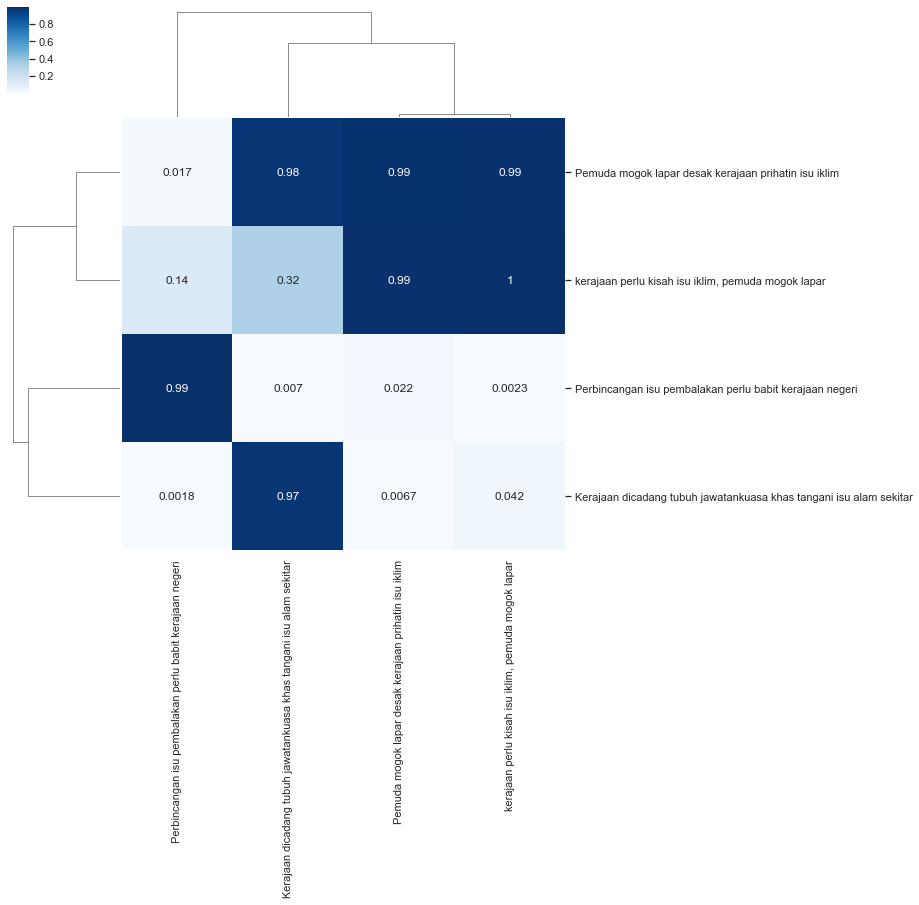

In [10]:
model.tree_plot([string1, string2, string3, string4])

In [4]:
alxlnet = malaya.similarity.transformer(model = 'alxlnet')
albert = malaya.similarity.transformer(model = 'albert')
tiny_bert = malaya.similarity.transformer(model = 'tiny-bert')





INFO:tensorflow:loading sentence piece model


## Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack zero-shot classification models, you need to pass labels using keyword parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], strings_right = List[str])
```

We will passed `strings_right` as `**kwargs`.

In [5]:
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string1, string2, news1, news1], 
                           strings_right = [string3, string4, husein, string1])

array([0.99745977, 0.07261255, 0.16457608, 0.03985301], dtype=float32)